In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

## Load training data

In [2]:
train = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Banking/train.csv")

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [7]:
train.shape

(164309, 14)

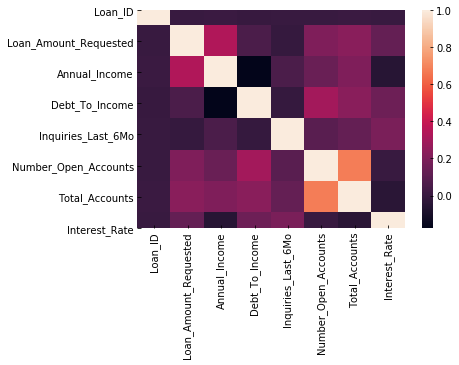

In [62]:
sns.heatmap(train.corr())

## Check the column null values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [8]:
train.isnull().sum()/train.shape[0]

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

## 4 columns have null values

1. Length_Employed - 4%
2. Home_Owner - 15%
3. Annual_Income - 15%
4. Months_Since_Deliquency - 53%

### Getting count of non-null values in a column

In [11]:
train['Length_Employed'].count()

156938

## Check the null values in "Month_Since_Deliquency" column

In [12]:
train[train['Months_Since_Deliquency'].isnull()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,10000006,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164299,10164300,"3,000",3 years,Mortgage,45000.0,VERIFIED - income source,major_purchase,8.43,2,NaN,25,36,Male,2
164301,10164302,"16,000",6 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,12.48,4,NaN,10,18,Male,2
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1


## Drop Months_Since_Deliquency column

In [46]:
del train['Months_Since_Deliquency']
print(train.shape)

## Check the count of Interest Rate (Target Variable)

In [81]:
train.Interest_Rate.value_counts()*100/len(train.Interest_Rate)

2    42.955651
3    36.469700
1    20.574649
Name: Interest_Rate, dtype: float64

High dimensional datasets have the problem of presence ofirrelevant or redundant features which often lowers the per-formance of machine learning algorithms. Hence, the use ofsuitable feature selection methods becomes essential for clas-sification tasks that deal with high dimensional data

Feature selection or attribute evaluator or filter method con-sists of identifying the relevant features and ignoring theirrelevant ones from a dataset

1. Correlation-based feature selection (CFS)
2. Symmetrical uncertainty (SU)

In [7]:
train.shape

(164309, 14)

In [6]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [44]:
print(set(train.dtypes.tolist()))

{dtype('O'), dtype('int64'), dtype('float64')}


## Convert non null columns to float and int

In [49]:
train['Debt_To_Income'] = train['Debt_To_Income'].astype(float)
train['Inquiries_Last_6Mo'] = train['Inquiries_Last_6Mo'].astype(int)
train['Number_Open_Accounts'] = train['Number_Open_Accounts'].astype(int)
train['Total_Accounts'] = train['Total_Accounts'].astype(int)

### Check change in datatype

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  float64
 2   Length_Employed        156938 non-null  object 
 3   Home_Owner             138960 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int32  
 9   Number_Open_Accounts   164309 non-null  int32  
 10  Total_Accounts         164309 non-null  int32  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 14.4+ MB


## Select specific data type columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC66F15320>,
      dtype=object)

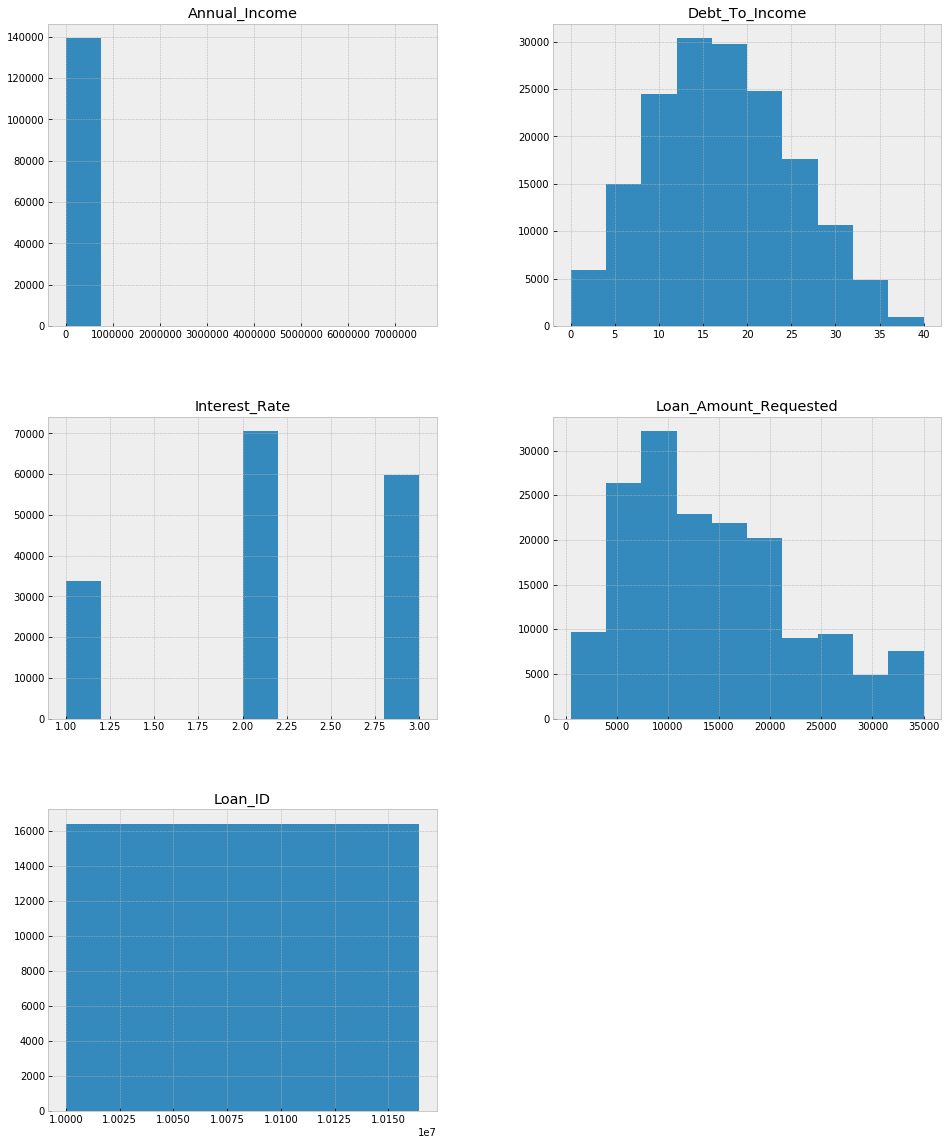

In [64]:
df_numerical = train.select_dtypes(include = ['int64', 'float64'])
df_numerical.hist(figsize = (16, 20), bins = 10)

## 1. Column - Loan_Amount_Requested

The listed amount of the loan applied for by the borrower.

#### Replace comma in the entire column

In [30]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].replace(",", "", regex = True)

#### Check the update

In [31]:
train['Loan_Amount_Requested']

0          7000
1         30000
2         24725
3         16000
4         17000
          ...  
164304    20725
164305     6000
164306    20250
164307    10000
164308     9250
Name: Loan_Amount_Requested, Length: 164309, dtype: object

#### Convert column into a float datatype

In [32]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].astype(float)

In [43]:
type(train['Loan_Amount_Requested'])

pandas.core.series.Series

In [58]:
train.Loan_Amount_Requested.describe()

count    164309.00000
mean      14349.33692
std        8281.86870
min         500.00000
25%        8000.00000
50%       12075.00000
75%       20000.00000
max       35000.00000
Name: Loan_Amount_Requested, dtype: float64

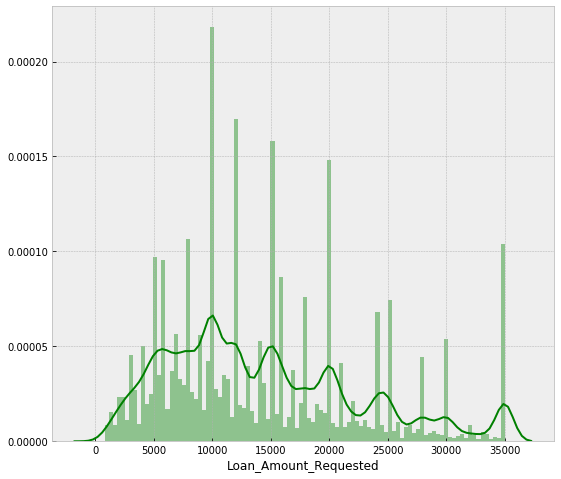

In [61]:
plt.figure(figsize = (9,8))
sns.distplot(train['Loan_Amount_Requested'] , color = 'g', bins = 100, hist_kws = {'alpha':0.4})

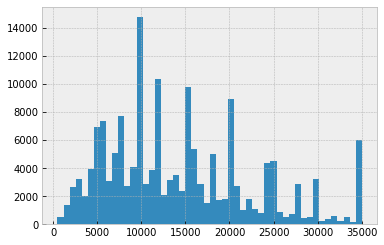

In [65]:
train.Loan_Amount_Requested.hist(bins = 50)

### Observation - Seems the distribtuion is right skewed, multimodal and some outliers as well. We need to try and get rid of all this to get a normal distribution (or simply apply a log transform to shift the data)

## 2. Column - Length_Employed

Employment length in years

In [79]:
train.Length_Employed.describe()

count        164309
unique           11
top       10+ years
freq          55407
Name: Length_Employed, dtype: object

In [8]:
train.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

### 7371 missing values need to be filled

In [68]:
train.Length_Employed.isnull().sum()

7371

## Missing value fix by Forward fill

In [77]:
train.Length_Employed.ffill(axis = 0, inplace = True)
train.Length_Employed.isnull().sum()

In [80]:
pd.crosstab(index = train.Length_Employed, columns = train.Interest_Rate, normalize = 'index')

Interest_Rate,1,2,3
Length_Employed,,,
1 year,0.215978,0.441139,0.342883
10+ years,0.199650,0.422943,0.377407
2 years,0.210578,0.438633,0.350789
3 years,0.217673,0.432331,0.349996
4 years,0.208776,0.438323,0.352901
5 years,0.207321,0.419747,0.372932
6 years,0.201614,0.423242,0.375144
7 years,0.190721,0.429378,0.379901
8 years,0.202446,0.438068,0.359487


### Replace "year", "years", "+", "<" from the column  and make it int categorical

In [113]:
train.Length_Employed.replace("years", "", regex = True, inplace = True)
train.Length_Employed.replace("year", "", regex = True, inplace = True)
train.Length_Employed.replace('\+', "", regex = True, inplace = True)
train.Length_Employed.replace("<", "", regex = True, inplace = True)
train.Length_Employed.replace(" ", "", regex = True, inplace = True)

In [114]:
train.Length_Employed.unique()

array(['1', '4', '7', '8', '2', '10', '6', '9', '3', '5'], dtype=object)

### Observation - The cross tab distribution of Length employed and Interest Rate seems to be uniform across the categories

## 3. Column - Home Owner

In [85]:
train.Home_Owner.describe()

count       164309
unique           5
top       Mortgage
freq         83304
Name: Home_Owner, dtype: object

In [9]:
train.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

### Check missing values

In [83]:
train.Home_Owner.isnull().sum()

25349

### Missing values fix by forward fill

In [84]:
train.Home_Owner.ffill(axis = 0, inplace = True)
train.Home_Owner.isnull().sum()

0

In [89]:
pd.crosstab(index = train.Home_Owner, columns = train.Interest_Rate)

Interest_Rate,1,2,3
Home_Owner,,,
Mortgage,19033,35187,29084
None,6,1,4
Other,12,27,16
Own,2981,6358,5436
Rent,11774,29007,25383


### Observation - 'None' and 'Other' seem to be having a significant distinction from the uniform trend. This can be a distinguishing factor. However, their absolute numbers are very low

## Replace values to make it int categorical

In [137]:
train.Home_Owner.replace("Mortgage", "0", regex = True, inplace = True)
train.Home_Owner.replace("None", "1", regex = True, inplace = True)
train.Home_Owner.replace("Other", "2", regex = True, inplace = True)
train.Home_Owner.replace("Own", "3", regex = True, inplace = True)
train.Home_Owner.replace("Rent", "4", regex = True, inplace = True)

In [138]:
train.Home_Owner.unique()

array(['4', '0', '3', '2', '1'], dtype=object)

## 4. Column - Annual Income

The annual income provided by the borrower during registration.

In [91]:
train.Annual_Income.isnull().sum()

25102

In [92]:
train.Annual_Income.ffill(axis = 0, inplace = True)
train.Annual_Income.isnull().sum()

0

## 5. Column - Income_Verified

Indicates if income was verified, not verified, or if the income source was verified

In [10]:
train.Income_Verified.value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [117]:
pd.crosstab(index = train.Income_Verified, columns = train.Interest_Rate, normalize = 'index')

Interest_Rate,1,2,3
Income_Verified,,,
VERIFIED - income,0.144191,0.381515,0.474294
VERIFIED - income source,0.195643,0.432198,0.372159
not verified,0.286585,0.481888,0.231527


### Observation - If income is verfied then more likely to put in 3rd category, if source verified then more likely in 2nd category and if not verified then strong pull in 2nd and 1st. 

### This variable can be a strong indicator of class

In [142]:
## Replace values to make int categorical

train.Income_Verified.replace("VERIFIED - income source", "1", regex = True, inplace = True)
train.Income_Verified.replace("VERIFIED - income", "0", regex = True, inplace = True)
train.Income_Verified.replace("not verified", "2", regex = True, inplace = True)

#train.Income_Verified.replace("0 source", "1", regex = True, inplace = True)


In [143]:
train.Income_Verified.unique()

array(['2', '0', '1'], dtype=object)

## 6. Column - Purpose_Of_Loan

In [120]:
pd.crosstab(index = train.Purpose_Of_Loan, columns = train.Interest_Rate, normalize = 'index')

Interest_Rate,1,2,3
Purpose_Of_Loan,,,
car,0.350663,0.417507,0.231830
credit_card,0.287918,0.460528,0.251554
debt_consolidation,0.176404,0.435691,0.387905
educational,0.305785,0.644628,0.049587
home_improvement,0.235732,0.417305,0.346963
house,0.177232,0.311772,0.510996
major_purchase,0.307132,0.400873,0.291994
medical,0.144062,0.364698,0.491239
moving,0.124230,0.298768,0.577002


In [12]:
train.Purpose_Of_Loan.value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [144]:
train.Purpose_Of_Loan.replace("debt_consolidation", "0", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("credit_card", "1", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("home_improvement", "2", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("other", "3", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("major_purchase", "4", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("small_business", "5", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("car", "6", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("medical", "7", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("moving", "8", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("vacation", "9", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("wedding", "10", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("house", "11", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("renewable_energy", "12", inplace = True, regex = True)
train.Purpose_Of_Loan.replace("educational", "13", inplace = True, regex = True)

In [145]:
train.Purpose_Of_Loan.unique()

array(['6', '0', '1', '2', '4', '3', '7', '5', '8', '10', '9', '11', '13',
       '12'], dtype=object)

## 7. Column: Debt_To_Income

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

In [56]:
train.Debt_To_Income.describe()

count    164309.000000
mean         17.207189
std           7.845083
min           0.000000
25%          11.370000
50%          16.840000
75%          22.780000
max          39.990000
Name: Debt_To_Income, dtype: float64

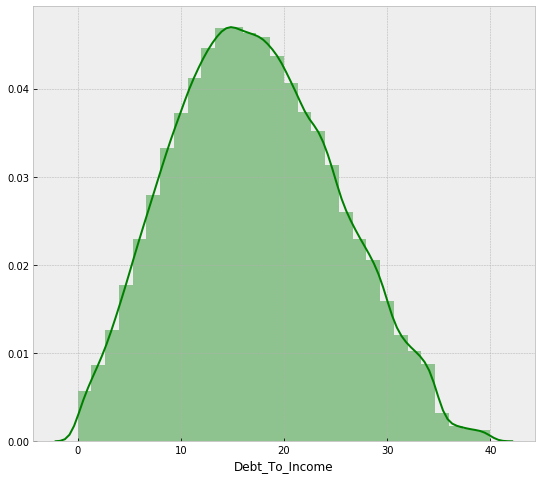

In [57]:
plt.figure(figsize = (9,8))
sns.distplot(train['Debt_To_Income'] , color = 'g', bins = 30, hist_kws = {'alpha':0.4})

### Observation - Seems a normal distribution

## 8. Column - Inquiries_Last_6Mo

The number of inquiries by creditors during the past 6 months

In [13]:
train.Inquiries_Last_6Mo.value_counts()

0    85665
1    46071
2    20297
3     8863
4     2278
5      772
6      335
7       20
8        8
Name: Inquiries_Last_6Mo, dtype: int64

In [126]:
pd.crosstab(index = train.Inquiries_Last_6Mo, columns = train.Interest_Rate, normalize = 'index')

Interest_Rate,1,2,3
Inquiries_Last_6Mo,,,
0,0.257375,0.456826,0.285799
1,0.170411,0.419722,0.409867
2,0.130463,0.384244,0.485293
3,0.109782,0.350897,0.539321
4,0.089113,0.337138,0.573749
5,0.079016,0.360104,0.560881
6,0.062687,0.414925,0.522388
7,0.000000,0.750000,0.250000
8,0.125000,0.000000,0.875000


In [121]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,1,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000.0,4,Mortgage,68000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725.0,7,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000.0,1,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000.0,8,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [18]:
train.Gender.value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

In [146]:
train.Gender.replace("Male", "0", regex = True, inplace = True)
train.Gender.replace("Female", "1", regex = True, inplace = True)

## Modeling

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [190]:
y = train['Interest_Rate']
X = train.drop('Interest_Rate', axis = 1)
X = X.drop('Loan_ID', axis = 1)
X.shape, y.shape

((164309, 11), (164309,))

In [171]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate'],
      dtype='object')

In [185]:
X = X.drop(['Gender'], axis = 1)

In [191]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [192]:
X_train.shape, X_val.shape

((131447, 11), (32862, 11))

In [195]:
rf_clf = RandomForestClassifier(n_estimators = 500, max_features = 'auto', criterion = 'entropy', class_weight = 'balanced')

### Training accuracy

In [206]:
rf_clf.score(X_train, y_train)

1.0

### Validation accuracy

In [196]:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
accuracy = rf_clf.score(X_val, y_val)
accuracy

0.5054774511593938

## Result log:

1. Accuracy 1 = 50.3% (Only remove Loan ID and delinquincy)
2. Accuracy 2 - 46% (On removing multiple features)
3. Accuracy 3 - 49.7% (On removing two features)
4. Accuracy 4 - (On removing only Gender)

In [169]:
import numpy as np

([<matplotlib.axis.XTick at 0x2ac6959e0f0>,
 <a list of 11 Text xticklabel objects>)

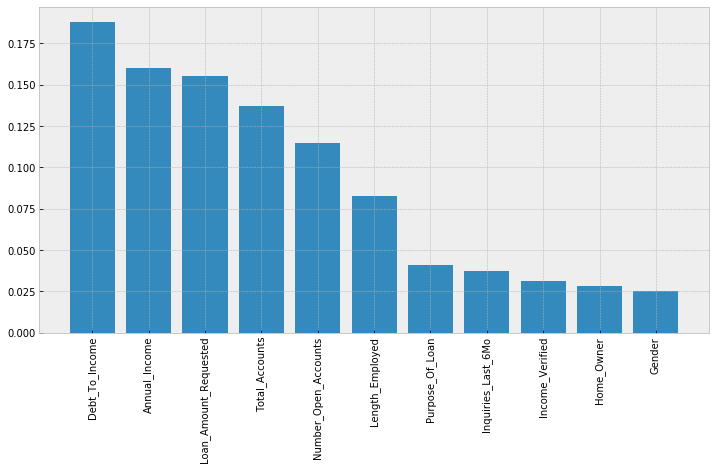

In [170]:
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 12), importances[indices], align="center")

plt.xticks(range(1, 12), X_train.columns[indices], rotation=90)

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lb = LabelEncoder()
train_Y = lb.fit_transform(y_train)
val_y = lb.transform(y_val)

logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, train_Y)
logreg.predict(X_val)
print('LogisticRegression LogLoss {score}'.format(score=log_loss(y_val, logreg.predict_proba(X_val))))

#clfs.append(logreg)


LogisticRegression LogLoss 1.0496239332149244


# Testing

In [155]:
test = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Banking/test.csv")

In [156]:
del test['Months_Since_Deliquency']

test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].replace(",", "", regex = True)
test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].astype(float)

test['Debt_To_Income'] = test['Debt_To_Income'].astype(float)
test['Inquiries_Last_6Mo'] = test['Inquiries_Last_6Mo'].astype(int)
test['Number_Open_Accounts'] = test['Number_Open_Accounts'].astype(int)
test['Total_Accounts'] = test['Total_Accounts'].astype(int)


test.Length_Employed.ffill(axis = 0, inplace = True)


test.Length_Employed.replace("years", "", regex = True, inplace = True)
test.Length_Employed.replace("year", "", regex = True, inplace = True)
test.Length_Employed.replace('\+', "", regex = True, inplace = True)
test.Length_Employed.replace("<", "", regex = True, inplace = True)
test.Length_Employed.replace(" ", "", regex = True, inplace = True)

test.Home_Owner.ffill(axis = 0, inplace = True)

test.Home_Owner.replace("Mortgage", "0", regex = True, inplace = True)
test.Home_Owner.replace("None", "1", regex = True, inplace = True)
test.Home_Owner.replace("Other", "2", regex = True, inplace = True)
test.Home_Owner.replace("Own", "3", regex = True, inplace = True)
test.Home_Owner.replace("Rent", "4", regex = True, inplace = True)

test.Annual_Income.ffill(axis = 0, inplace = True)

test.Income_Verified.replace("VERIFIED - income source", "1", regex = True, inplace = True)
test.Income_Verified.replace("VERIFIED - income", "0", regex = True, inplace = True)
test.Income_Verified.replace("not verified", "2", regex = True, inplace = True)


test.Purpose_Of_Loan.replace("debt_consolidation", "0", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("credit_card", "1", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("home_improvement", "2", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("other", "3", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("major_purchase", "4", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("small_business", "5", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("car", "6", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("medical", "7", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("moving", "8", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("vacation", "9", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("wedding", "10", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("house", "11", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("renewable_energy", "12", inplace = True, regex = True)
test.Purpose_Of_Loan.replace("educational", "13", inplace = True, regex = True)


test.Gender.replace("Male", "0", regex = True, inplace = True)
test.Gender.replace("Female", "1", regex = True, inplace = True)

test.drop('Loan_ID', axis = 1, inplace = True)

In [165]:
test.Home_Owner.ffill(axis = 0, inplace = True)
test.isnull().sum()

Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64

In [200]:
#y_test_pred = rf_clf.predict(test)
y_test_pred = logreg.predict(test)

In [201]:
pred = pd.DataFrame(y_test_pred)
pred.to_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Banking/pred2.csv")